In [1]:
from dataclasses import dataclass
import numpy as np
import matplotlib.pyplot as plt
import tables
import matplotlib as mpl

In [12]:
path = "/mnt/storage2/phd/data/thunderstorm/neutron/spacecraft.hdf5"
path = "/mnt/storage2/phd/data/thunderstorm/neutron/spacecraft_opt4.hdf5"

In [60]:
path = "/mnt/storage2/phd/data/thunderstorm/neutron/spacecraft_opt4.hdf5"
with tables.open_file(path) as h5file:
    result = []
    for group in h5file.root:
        table = h5file.get_node(group, "stacking_simple")
        print(repr(table.attrs))
        break

/sim0000/stacking_simple._v_attrs (AttributeSet), 29 attributes:
   [CLASS := 'TABLE',
    FIELD_0_FILL := 0,
    FIELD_0_NAME := 'event',
    FIELD_1_FILL := 0,
    FIELD_1_NAME := 'id',
    FIELD_2_FILL := 0,
    FIELD_2_NAME := 'parent_id',
    FIELD_3_FILL := 0,
    FIELD_3_NAME := 'particle',
    FIELD_4_FILL := 0.0,
    FIELD_4_NAME := 'energy',
    FIELD_5_FILL := 0.0,
    FIELD_5_NAME := 'theta',
    FIELD_6_FILL := 0.0,
    FIELD_6_NAME := 'radius',
    FIELD_7_FILL := 0.0,
    FIELD_7_NAME := 'z',
    FIELD_8_FILL := 0.0,
    FIELD_8_NAME := 'time',
    NROWS := 12998,
    TITLE := '',
    VERSION := '2.7',
    path := 'sim0000',
    text := '/npm/geometry/type gdml\n/npm/geometry/gdml ../SpaceCraftFullAtmosphere.gdml\n/npm/thunderstorm/physics withoutEmStandard\n/npm/thunderstorm/minimal_energy 10.0 MeV\n/npm/thunderstorm/stacking/electron false\n/npm/thunderstorm/stacking/positron false\n/npm/thunderstorm/stacking/gamma true\n/npm/thunderstorm/stacking/save_gamma false\n/np

In [44]:
def get_data(path):
    with tables.open_file(path) as h5file:
        result = []
        for group in h5file.root:
            table = h5file.get_node(group, "stacking_simple")
            data = table.read()
            result.append(data)
        return np.hstack(result)

In [45]:
def plot_z_hist(data):
    indx = data["z"] < 800000

    plt.hist(data["z"][indx]/1000, weights=1e-5*np.ones(np.sum(indx)))
    plt.yscale("log")
    plt.xlabel("Высота, км")
    plt.ylabel("Число нейтронов")

    print("Отношение рожденных в корабле к рожденным в атмосфере: {}".format(np.sum(np.logical_not(indx))/np.sum(indx)))

In [46]:
def plot_spacecraft(data):
    indx = data["z"] < 800000
    plt.hist(data["z"][np.logical_not(indx)]/1000, weights=1e-5*np.ones(np.sum(np.logical_not(indx))))
    plt.xlabel("Высота, км")
    plt.ylabel("Число нейтронов")

In [50]:
path = "/mnt/storage2/phd/data/thunderstorm/neutron/spacecraft.hdf5"
data = get_data(path)

Отношение рожденных в корабле к рожденным в атмосфере: 29.294418604651163


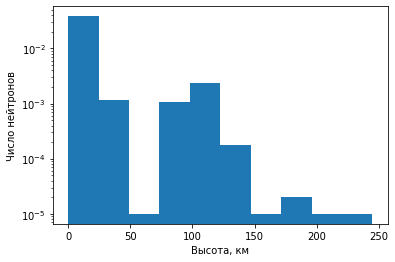

In [51]:
plot_z_hist(data)

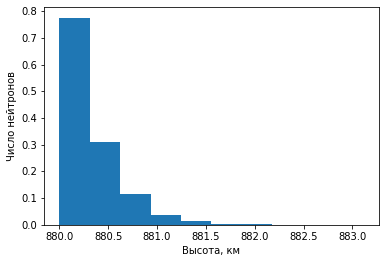

In [52]:
plot_spacecraft(data)

In [56]:
path = "/mnt/storage2/phd/data/thunderstorm/neutron/spacecraft_opt4.hdf5"
data_opt4 = get_data(path)

Отношение рожденных в корабле к рожденным в атмосфере: 30.857702669605683


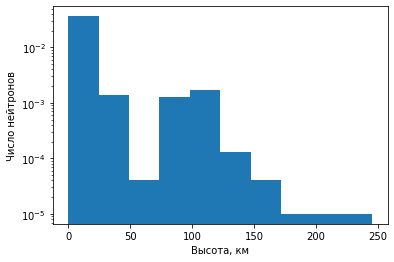

In [57]:
plot_z_hist(data_opt4)

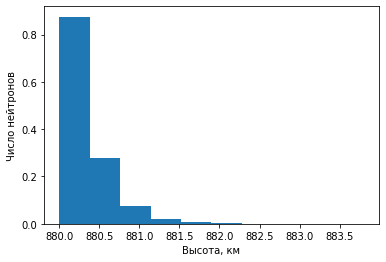

In [58]:
plot_spacecraft(data_opt4)